<a href="https://colab.research.google.com/github/conextm/python/blob/main/M2_Clase_7_Colab_Funci%C3%B3n_Apply_y_Lambda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Función Apply y Lambda en Pandas

Como ya sabemos, Pandas es una librería que nos brinda muchas opciones para trabajar con datos y tablas de datos de una forma estructurada. Dentro de las funciones que hemos visto tenemos:
<ul>
    <li>Crear columnas nuevas con un valor predeterminado.</li>
    <li>Filtrar y crear nuevas tablas con datos de un DataFrame.</li>
    <li>Realizar operaciones sobre todos los datos de una columna.</li>
    <li>Obtener tablas de frecuencia de los valores en una columna</li>
    <li>Merge, Join, Concat, Append: Que nos permiten hacer uniones entre DataFrames y otros tipos de variables.</li>
    <li>Entre otros...</li>
</ul>
Así mismo, ahora vamos a ver cómo podemos aplicar una función directamente sobre los datos que tenemos.<br>
Para esto, vamos a ver tres tipos de operaciones, la primera consiste en la forma más directa, pero es la que tiene más limitaciones.<br>
Luego veremos 2 opciones usando la función <b>.apply()</b><br>
<ul>
    <li>Aplicando una función propia sobre una columna y registrando el resultado en una nueva columna.</li>
    <li>Usando la función Lambda, para mejorar el alcance de la función <b>.apply()</b></li>
</ul>

## Librerías

In [ ]:
import pandas as pd
import numpy as np
from IPython import display

## Funciones o procesos básicos

Primero vamos a ver una forma simple que permite Pandas para usar los datos de una columna en la creación de una columna nueva.

In [ ]:
d = {'col1': [1, 2], 'col2': [3, 4], 'col3': ["3.3", "4.4"]}
df = pd.DataFrame(data=d)
df

,col1,col2,col3
0,1,3,3.3
1,2,4,4.4


De esta forma, usamos este DataFrame para crear una nueva columna que contenga la sumatoria de los datos en la columna 1 y columna 2 por cada fila.<br>
Podemos ver que la forma de expresar esto en código es muy simple, únicamente se indica que la nueva columna 4 contiene la información de la columna 1 sumada con la columna 2.

In [ ]:
df["col4"] = df["col1"] + df["col2"]
df

,col1,col2,col3,col4
0,1,3,3.3,4
1,2,4,4.4,6


De igual forma, podemos realizar operaciones simples con otras variables externas al DataFrame.

In [ ]:
df["col5"] = df["col4"]  + 3
df

,col1,col2,col3,col4,col5
0,1,3,3.3,4,7
1,2,4,4.4,6,9


No obstante, al querer hacer funciones más avanzadas, como partir un *String*, vamos a tener problemas.<br>
En el siguiente ejemplo, se intenta partir un *string* y tomar únicamente el primer dígito. Como podemos ver no se obtiene el resultado deseado de obtener el primer dígito de la columna 3 y ponerlo en la columna 6.
Podemos intentar de diferentes formas, pero la solución más eficiente sería usar una función y hacer uso de <b>.apply()</b>.

In [ ]:
df["col6"] = df["col3"][:][0]
df

,col1,col2,col3,col4,col5,col6
0,1,3,3.3,4,7,3.3
1,2,4,4.4,6,9,3.3


## Apply

Ahora vamos a realizar una tarea un poco más compleja.<br>
Vamos a separar un *String* en columnas y guardar la información como si fuera un valor numérico.<br>
Primero debemos cargar la base de datos, para esto vamos a usar una base de datos que se encuentra en un formato (.xlsx).<br>
La función .read_excel() de Pandas nos permite cargar archivos y verlos como un DataFrame. La forma de escribir el comando puede variar dependiendo de dónde esté guardado el archivo, pero aquí vamos a usar la forma más sencilla, que es guardar el archivo donde estamos corriendo el código.

In [ ]:
df_partidos = pd.read_excel("Datos_apply.xlsx")
print(df_partidos.shape)
df_partidos.head()

(40, 10)


,Semana,Día,Fecha,Hora,Equipo Local,Puntaje,Visitante,Público,Estadio,Árbitro
0,1,Vie,2016-08-19,20:45 (15:45),Málaga,1–1,Osasuna,22.347,Estadio La Rosaleda,Santiago Jaime
1,1,Vie,2016-08-19,22:00 (17:00),La Coruña,2–1,Eibar,21.441,Estadio Municipal de Riazor,Mario Melero
2,1,Sáb,2016-08-20,18:15 (13:15),Barcelona,6–2,Betis,65.731,Camp Nou,Alberto Undiano
3,1,Sáb,2016-08-20,20:15 (15:15),Granada,1–1,Villarreal,15.149,Estadio Nuevo Los Cármenes,Javier Estrada
4,1,Sáb,2016-08-20,22:15 (17:15),Sevilla,6–4,Espanyol,29.420,Estadio Ramón Sánchez Pizjuán,José González


La tarea que vamos a realizar es tomar los datos de la columna puntaje y dividirla para tener el puntaje de cada equipo en una columna independiente. De esta forma podríamos repondernos preguntas, como si en promedio se realizan más goles como Local o como Visitante.

Primero vamos a mostrar lo que se va a hacer con un elemento en particular.<br>
Para esto vamos a seleccionar el dato de la columna Puntaje de la primera fila.

<p>Acá tenemos la explicación de cómo funcionará el código</p>
    

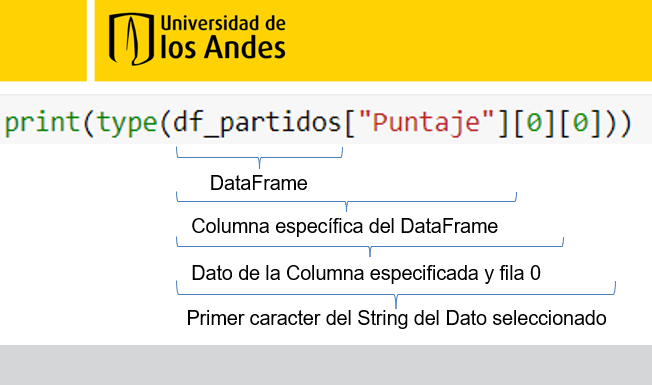

In [ ]:

display.Image("/content/Img1.png")

In [ ]:
'1-----1'

'1-----1'

In [ ]:
df_partidos["Puntaje"][0]#[-1]

'1–1'

Ahora vamos a ver cómo separamos este puntaje en 2 columnas y pasamos de *string* a número.

In [ ]:
print(df_partidos["Puntaje"][0][0])
print(df_partidos["Puntaje"][0][-1])

1
1


Solo nos faltaría pasar el número de `str` a `int`

In [ ]:
print(type(df_partidos["Puntaje"][0][0]))
print(type(int(df_partidos["Puntaje"][0][-1])))

<class 'str'>
<class 'int'>


<p>La forma de usar la función <b>.apply()</b> es la siguiente.

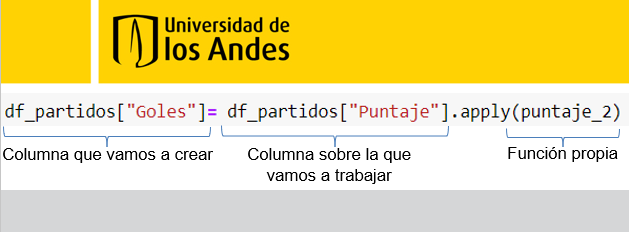

In [ ]:
display.Image("/content/Img2.png")

<p>Debemos seleccionar sobre qué elementos vamos a trabajar y luego mencionar la función que vamos a usar.</p>
    </p>

<p>Comparemos nuestro ejercicio de un solo dato a cómo quedaría con <b>.apply</b>.


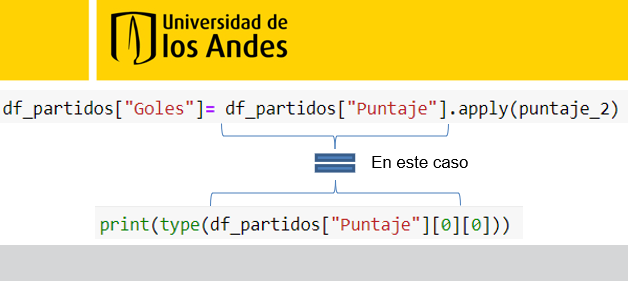

In [ ]:
display.Image("/content/Img3.png")

Luego de ver cómo se realizaría con un dato en particular, vamos a transformar ese proceso en una función.

<p>Finalmente vemos cómo se traduciría a nuestra función todo lo que hemos realizado.


In [ ]:
df_partidos['Puntaje']

0     1–1
1     2–1
2     6–2
3     1–1
4     6–4
5     2–1
6     0–3
7     1–1
8     0–1
9     2–4
10    0–0
11    2–2
12    1–0
13    0–2
14    2–1
15    0–0
16    5–1
17    0–0
18    0–1
19    0–0
20    1–1
21    0–4
22    5–2
23    2–1
24    0–2
25    1–2
26    2–1
27    2–3
28    1–2
29    0–1
30    2–2
31    1–5
32    5–0
33    1–1
34    1–0
35    0–0
36    2–1
37    2–1
38    0–2
39    0–0
Name: Puntaje, dtype: object

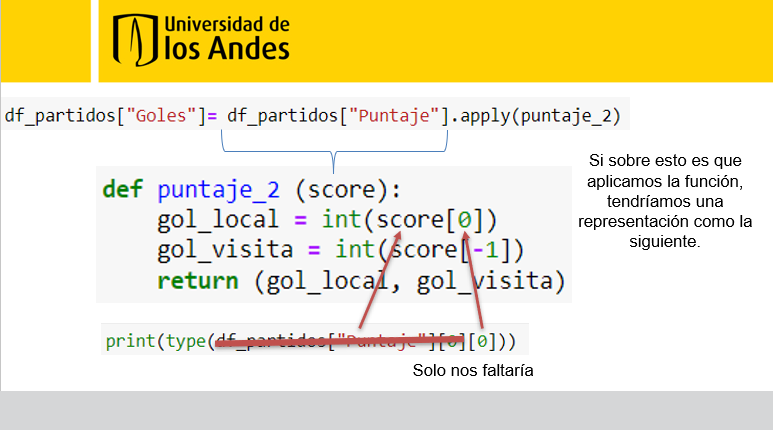

In [ ]:
display.Image("/content/Img4.png")

In [ ]:
def puntaje_2(score):
    gol_local = int(score[0])
    gol_visita = int(score[-1])
    return (gol_local, gol_visita)

Ahora si, aplicamos la función a nuestros datos.

In [ ]:
df_partidos["Goles"] = df_partidos["Puntaje"].apply(puntaje_2)
df_partidos.head()

,Semana,Día,Fecha,Hora,Equipo Local,Puntaje,Visitante,Público,Estadio,Árbitro,Goles
0,1,Vie,2016-08-19,20:45 (15:45),Málaga,1–1,Osasuna,22.347,Estadio La Rosaleda,Santiago Jaime,"(1, 1)"
1,1,Vie,2016-08-19,22:00 (17:00),La Coruña,2–1,Eibar,21.441,Estadio Municipal de Riazor,Mario Melero,"(2, 1)"
2,1,Sáb,2016-08-20,18:15 (13:15),Barcelona,6–2,Betis,65.731,Camp Nou,Alberto Undiano,"(6, 2)"
3,1,Sáb,2016-08-20,20:15 (15:15),Granada,1–1,Villarreal,15.149,Estadio Nuevo Los Cármenes,Javier Estrada,"(1, 1)"
4,1,Sáb,2016-08-20,22:15 (17:15),Sevilla,6–4,Espanyol,29.420,Estadio Ramón Sánchez Pizjuán,José González,"(6, 4)"


Como podemos observar, el resultado nos deja en una misma columna los datos tanto de Local como Visitante. Esto es un avance pero no la solución que queremos, entonces vamos a dividir la función en 2.

Vemos que con esta función solo podemos devolver un ítem, por lo que si queremos tener el resultado en dos columnas separadas tenemos que crear 2 funciones.

In [ ]:
def puntaje_local(score):
    return int(score[0])

def puntaje_visita(score):
    return int(score[-1])

In [ ]:
df_partidos["Goles_Local"] = df_partidos["Puntaje"].apply(puntaje_local)
df_partidos["Goles_Visita"] = df_partidos["Puntaje"].apply(puntaje_visita)
df_partidos.head()

,Semana,Día,Fecha,Hora,Equipo Local,Puntaje,Visitante,Público,Estadio,Árbitro,Goles,Goles_Local,Goles_Visita
0,1,Vie,2016-08-19,20:45 (15:45),Málaga,1–1,Osasuna,22.347,Estadio La Rosaleda,Santiago Jaime,"(1, 1)",1,1
1,1,Vie,2016-08-19,22:00 (17:00),La Coruña,2–1,Eibar,21.441,Estadio Municipal de Riazor,Mario Melero,"(2, 1)",2,1
2,1,Sáb,2016-08-20,18:15 (13:15),Barcelona,6–2,Betis,65.731,Camp Nou,Alberto Undiano,"(6, 2)",6,2
3,1,Sáb,2016-08-20,20:15 (15:15),Granada,1–1,Villarreal,15.149,Estadio Nuevo Los Cármenes,Javier Estrada,"(1, 1)",1,1
4,1,Sáb,2016-08-20,22:15 (17:15),Sevilla,6–4,Espanyol,29.420,Estadio Ramón Sánchez Pizjuán,José González,"(6, 4)",6,4


Perfecto, quedó la solución.

In [ ]:
data = {'A': [1, 2, 3, 4],
            'B': [5, 6, 7, 8],
            'C': [9, 10, 11, 12]}

df = pd.DataFrame(data)



print(df, '\n')
print("Axis 0 \n" , df.apply(np.sum, axis=0), "\n")
print("Axis 1 \n" , df.apply(np.sum, axis=1))


   A  B   C
0  1  5   9
1  2  6  10
2  3  7  11
3  4  8  12 

Axis 0 
 A    10
B    26
C    42
dtype: int64 

Axis 1 
 0    15
1    18
2    21
3    24
dtype: int64


## Función Lambda

Ahora vamos a aplicar una función que tome varios parámetros del DataFrame, para esto no podríamos usar solo el >b>.apply()</b>, entonces vamos a usar una nueva función que es <b>Lambda</b>.<br>
Lambda es una palabra clave de Python que nos permite crear una función sin necesidad de darle un nombre y guardarla en la memoria, pero acá lo que vamos a hacer es usar esa función para correr otra función propia.
<br>
Con esta función podemos usar funciones que hemos creado o escribir la función directamente.<br>

<b>Vamos a jugar a identificar a Jack y Rose</b><br>
Para esto vamos a usar la base de datos del Titanic que usamos la clase pasada y vamos a buscar en la información algunos datos característicos de los personajes para marcar cuáles cumplen con criterios específicos.

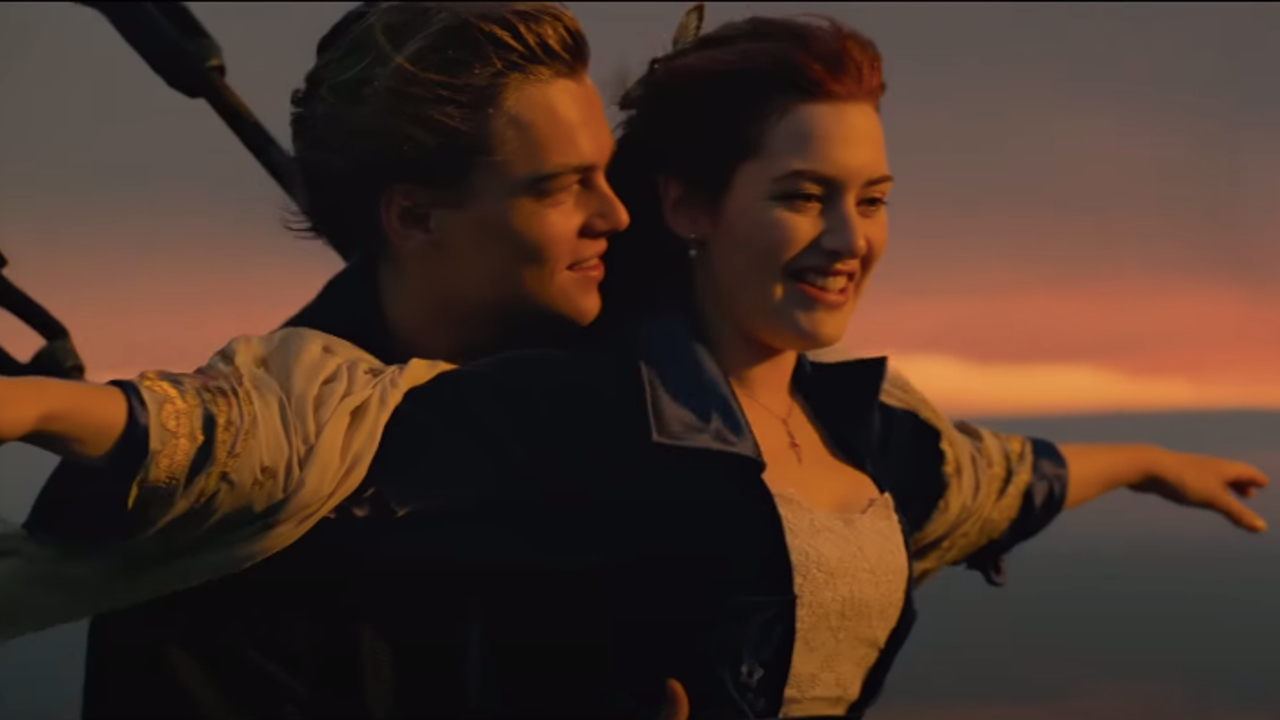

In [ ]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
print(df_titanic.shape)
df_titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


¿Qué elementos necesitamos? </ul>

<b>Rose</b>
<ul>
    <li>Survived: 1</li>
    <li>Pclass: 1</li>
    <li>Sex: female</li>
    <li>Age: 17, pero vamos a decir que menos de 23 y de 17 en adelante (para no tener problemas legales)</li>
</ul>
<b>Jack</b>
<ul>
    <li>Survived: 0</li>
    <li>Pclass: 3</li>
    <li>Sex: Male</li>
    <li>Age: 23, pero vamos a decir que menos de 25 y más de 20</li>
</ul>

Primero definimos una función para identificar a Rose y una diferente para identificar a Jack

In [ ]:
def es_Rose(sur, pclass, sex, age):
    if sur == 1:
        if pclass == 1:
            if sex == "female":
                if 17 <= age < 23:
                    return "Podría ser Rose"
    return "No podría ser Rose"

In [ ]:
def es_Jack(sur, pclass, sex, age):
    if sur == 0:
        if pclass == 3:
            if sex == "male":
                if 20 < age < 25:
                    return "Podría ser Jack"
    return "No podría ser Jack"

Ahora corremos las funciones y vemos el cambio en el DataFrame.

In [ ]:
df_titanic["Is_Rose"] = df_titanic.apply(lambda x: es_Rose(x["Survived"], x["Pclass"], x["Sex"], x["Age"]), axis=1)
df_titanic["Is_Jack"] = df_titanic.apply(lambda x: es_Jack(x["Survived"], x["Pclass"], x["Sex"], x["Age"]), axis=1)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_Rose,Is_Jack
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No podría ser Rose,Podría ser Jack
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,No podría ser Rose,No podría ser Jack
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,No podría ser Rose,No podría ser Jack
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,No podría ser Rose,No podría ser Jack
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No podría ser Rose,No podría ser Jack


In [ ]:
def apply_es_Rose(df_1row):
    """
    """
    sur =df_1row['Survived']
    pclass = df_1row['Pclass']
    sex = df_1row['Sex']
    age = df_1row['Age']
    if sur == 1:
        if pclass == 1:
            if sex == "female":
                if 17 <= age < 23:
                    return "Podría ser Rose"
    return "No podría ser Rose"

print("Test")
df_titanic['apply_solo_rose'] = df_titanic.apply(apply_es_Rose, axis=1)
df_titanic

Test


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_Rose,Is_Jack,apply_solo_rose
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No podría ser Rose,Podría ser Jack,No podría ser Rose
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,No podría ser Rose,No podría ser Jack,No podría ser Rose
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,No podría ser Rose,No podría ser Jack,No podría ser Rose
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,No podría ser Rose,No podría ser Jack,No podría ser Rose
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No podría ser Rose,No podría ser Jack,No podría ser Rose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,No podría ser Rose,No podría ser Jack,No podría ser Rose
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Podría ser Rose,No podría ser Jack,Podría ser Rose
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,No podría ser Rose,No podría ser Jack,No podría ser Rose
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,No podría ser Rose,No podría ser Jack,No podría ser Rose


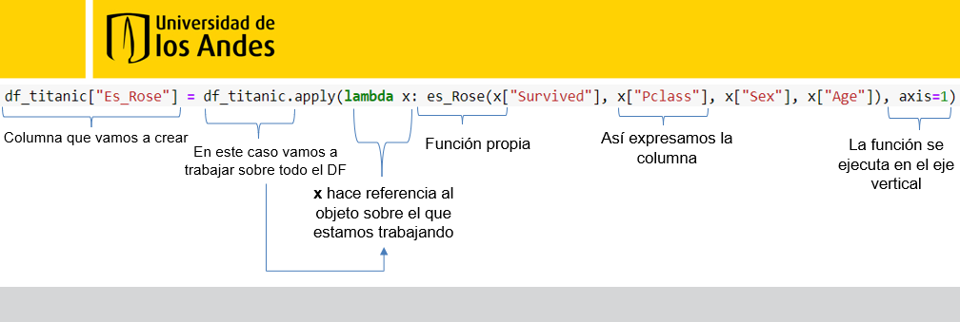

In [ ]:
display.Image("/content/Img5.png")

Finalmente, de acuerdo a las caracteristicas ¿cuántas personas quedaron marcadas como ROSE y JACK?

In [ ]:
df_titanic[df_titanic['Is_Rose'] == 'Podría ser Rose']['Is_Rose'].count()

14

In [ ]:
df_titanic['Is_Rose'].value_counts()

No podría ser Rose    877
Podría ser Rose        14
Name: Is_Rose, dtype: int64

In [ ]:
df_titanic['Is_Jack'].value_counts()

No podría ser Jack    852
Podría ser Jack        39
Name: Is_Jack, dtype: int64

### PARA PRACTICAR...

Genere una variable llamada "Rangos_Fare" con rangos de la variable "Fare".
- Menor o igual al percentil 25
- Mayor al percentil 25 y Menor o igual al percentil 50
- Mayor al percentil 25 y Menor o igual al percentil 75
- Mayor al percentil 75

Nota: Cree los rangos como considere más fácil para el usuario

**Tip:** La función  de numpy percentile(variable,percentil) le puede ayudar a generar el cálculo.

Analice resultados

In [ ]:
df_titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_Rose,Is_Jack,apply_solo_rose
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,No podría ser Rose,Podría ser Jack,No podría ser Rose


In [ ]:
import pandas as pd
import numpy as np


percentil_25 = np.percentile(df_titanic['Fare'], 25)
percentil_50 = np.percentile(df_titanic['Fare'], 50)
percentil_75 = np.percentile(df_titanic['Fare'], 75)

def asignar_rango(fare):
    """ Defina la funcion
    """
    if fare <= percentil_25 :
        return '<=25'
    elif percentil_25 < fare < percentil_50:
        return '(25, 50)'
    elif percentil_50 < fare < percentil_75:
        return '(50, 75)'
    else:
        return ('>75')

# Crear la columna 'Rangos_Fare' utilizando apply
df_titanic['Rangos_Fare'] = df_titanic['Fare'].apply(asignar_rango) # axis=0

df_titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_Rose,Is_Jack,apply_solo_rose,Rangos_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No podría ser Rose,Podría ser Jack,No podría ser Rose,<=25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,No podría ser Rose,No podría ser Jack,No podría ser Rose,>75
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,No podría ser Rose,No podría ser Jack,No podría ser Rose,"(25, 50)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,No podría ser Rose,No podría ser Jack,No podría ser Rose,>75
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No podría ser Rose,No podría ser Jack,No podría ser Rose,"(25, 50)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,No podría ser Rose,No podría ser Jack,No podría ser Rose,"(25, 50)"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Podría ser Rose,No podría ser Jack,Podría ser Rose,"(50, 75)"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,No podría ser Rose,No podría ser Jack,No podría ser Rose,"(50, 75)"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,No podría ser Rose,No podría ser Jack,No podría ser Rose,"(50, 75)"


In [ ]:
df_titanic['Fare'].apply(lambda x: asignar_rango(x))

0          <=25
1           >75
2      (25, 50)
3           >75
4      (25, 50)
         ...   
886    (25, 50)
887    (50, 75)
888    (50, 75)
889    (50, 75)
890        <=25
Name: Fare, Length: 891, dtype: object

In [ ]:
!pip install pytictoc

In [ ]:
from pytictoc import TicToc
t = TicToc()

In [ ]:
t.tic()
df_titanic['Fare'].apply(lambda x: asignar_rango(x))
t.toc()

Elapsed time is 0.014921 seconds.


In [ ]:
t.tic()
df_titanic['Rangos_Fare'] = df_titanic['Fare'].apply(asignar_rango)
t.toc()

Elapsed time is 0.005218 seconds.


In [ ]:
t.tic()
df_titanic.apply(lambda x: asignar_rango(x['Fare']), axis=1)
t.toc()

Elapsed time is 0.027937 seconds.
